Accuracy: 0.9393188854489164


c:\Users\varsh.LAPTOP-IG9S62OJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


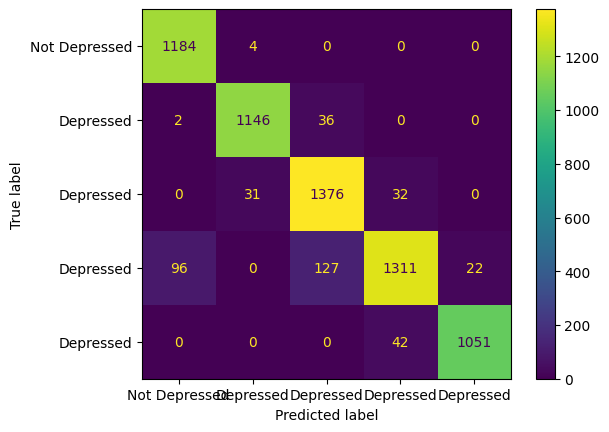

Accuracy: 0.9393188854489164


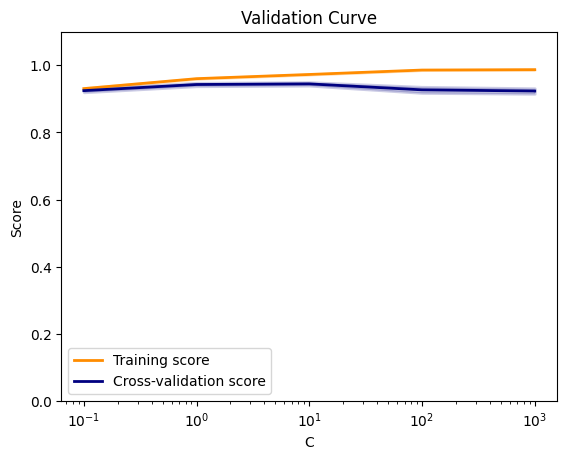

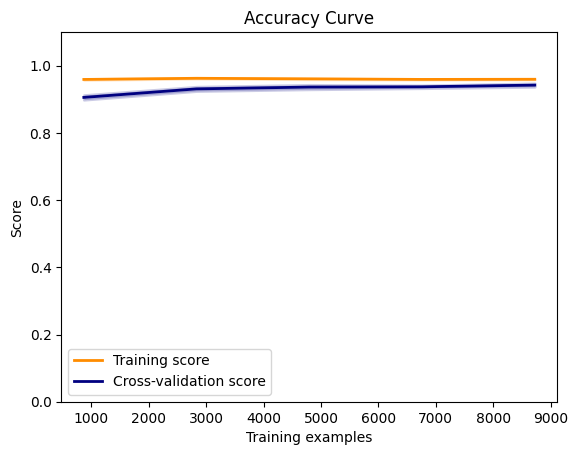

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
import numpy as np  
import pandas as pd
from sklearn.model_selection import train_test_split, validation_curve, learning_curve
# Load dataset
path = 'dataset/depressionDataset.csv'
df = pd.read_csv(path)
df = df[['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'class']]

# Handling Missing Data
df['q1'] = df['q1'].fillna(df['q1'].mode()[0])
df['q2'] = df['q2'].fillna(df['q2'].mode()[0])
df['q3'] = df['q3'].fillna(df['q3'].mode()[0])
df['q4'] = df['q4'].fillna(df['q4'].mode()[0])
df['q5'] = df['q5'].fillna(df['q5'].mode()[0])
df['q6'] = df['q6'].fillna(df['q6'].mode()[0])
df['q7'] = df['q7'].fillna(df['q7'].mode()[0])
df['q8'] = df['q8'].fillna(df['q8'].mode()[0])
df['q9'] = df['q9'].fillna(df['q9'].mode()[0])
df['q10'] = df['q10'].fillna(df['q10'].mode()[0])
df['class'] = df['class'].fillna(df['class'].mode()[0])

# Split the data
x = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].values
y = df.iloc[:, 10].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=24)

# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

# Evaluate the model
accuracy = svm_classifier.score(x_test, y_test)
print("Accuracy:", accuracy)

# Visualize the confusion matrix
plot_confusion_matrix(svm_classifier, x_test, y_test, display_labels=['Not Depressed', 'Depressed','Depressed','Depressed','Depressed'])
plt.show()
classifier = SVC()
classifier.fit(x_train, y_train)

# Predict on test data
y_pred = classifier.predict(x_test)

# Calculate accuracy
accuracy = classifier.score(x_test, y_test)
print('Accuracy:', accuracy)

# Plot validation curve
param_range = [0.1, 1, 10, 100, 1000]
train_scores, test_scores = validation_curve(SVC(), x_train, y_train,
                                             param_name='C',
                                             param_range=param_range,
                                             cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title('Validation Curve')
plt.xlabel('C')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label='Training score',
             color='darkorange', lw=lw)
plt.fill_between(param_range, train_scores_mean - np.std(train_scores, axis=1),
                 train_scores_mean + np.std(train_scores, axis=1), alpha=0.2,
                 color='darkorange', lw=lw)
plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
             color='navy', lw=lw)
plt.fill_between(param_range, test_scores_mean - np.std(test_scores, axis=1),
                 test_scores_mean + np.std(test_scores, axis=1), alpha=0.2,
                 color='navy', lw=lw)
plt.legend(loc='best')
plt.show()

# Plot accuracy curve
train_sizes, train_scores, test_scores = learning_curve(classifier, x_train, y_train, cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title('Accuracy Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(train_sizes, train_scores_mean, label='Training score',
         color='darkorange', lw=lw)
plt.fill_between(train_sizes, train_scores_mean - np.std(train_scores, axis=1),
                 train_scores_mean + np.std(train_scores, axis=1), alpha=0.2,
                 color='darkorange', lw=lw)
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score',
         color='navy', lw=lw)
plt.fill_between(train_sizes, test_scores_mean - np.std(test_scores, axis=1),
                 test_scores_mean + np.std(test_scores, axis=1), alpha=0.2,
                 color='navy', lw=lw)
plt.legend(loc='best')
plt.show()
